In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

In [2]:
df=pd.read_excel("C:\\Users\\charu\\Downloads\\Copper_Set.xlsx")
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [3]:
df['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable', nan], dtype=object)

In [4]:
df['item type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [5]:
print(df['material_ref'].unique())

['DEQ1 S460MC' '0000000000000000000000000000000000104991' 'S0380700' ...
 'MAS65550' '4.11043_1060X5_BRE' '202006170005.IO.1.1']


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [7]:
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [8]:
df1=df.drop(columns='material_ref')
df1.isnull().sum()

id                2
item_date         1
quantity tons     0
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
delivery date     1
selling_price     1
dtype: int64

In [9]:
df1['item_date'].fillna(0,inplace=True)
df1['item_date']=df1['item_date'].astype(str)

In [10]:
df1['item_date'].nunique()

253

In [11]:
df1.isnull().sum()

id                2
item_date         0
quantity tons     0
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
delivery date     1
selling_price     1
dtype: int64

In [12]:
df1

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,20200701.0,601.00


In [13]:
df1['item_date'] = df1['item_date'].astype(str).str.split('.').str[0].astype('int64')

In [14]:
df1['item_date'] = pd.to_datetime(df1['item_date'], format='%Y%m%d', errors='coerce')

In [15]:
df1.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00


In [16]:
mean_country=int(df1['country'].mean())
df1['country'].fillna(mean_country,inplace=True)
df1['country']=df1['country'].astype(int)

In [17]:
mean_application=int(df1['application'].mean())
df1['application'].fillna(mean_application,inplace=True)
df1['application']=df1['application'].astype(int)
df1['thickness'].fillna(0,inplace=True)
df1['width']=df1['width'].astype(int)
df1['selling_price'].fillna(0,inplace=True)
df1['status'].fillna(0,inplace=True)
df1['customer'].fillna(0,inplace=True)
df1.dropna(subset=['id'],inplace=True)


In [18]:
df1['delivery date'].fillna(0,inplace=True)
df1['delivery date']=df1['delivery date'].astype(str)

In [19]:
df1['delivery date'] = df1['delivery date'].astype(str).str.split('.').str[0].astype('int64')

In [20]:
df1['delivery date'] = pd.to_datetime(df1['delivery date'], format='%Y%m%d', errors='coerce')

In [21]:
df1.isnull().sum()

id               0
item_date        3
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    3
selling_price    0
dtype: int64

In [22]:
df1.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28,Won,W,10,2.00,1500,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25,Won,W,41,0.80,1210,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30,Won,WI,28,0.38,952,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32,Won,S,59,2.30,1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28,Won,W,10,4.00,2000,640665,2021-03-01,577.00


In [23]:
df1['quantity tons'] = pd.to_numeric(df1['quantity tons'], errors='coerce')
df1['quantity tons'] = df1['quantity tons'].astype(float)

In [24]:
df1["status"]= df1["status"].map({'Won':1, 'Draft':2, 'To be approved':3, 'Lost':0, 'Not lost for AM':4,
                                'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable':8})

In [25]:
df1['status']=df1['status'].astype(str)

In [26]:
df1['status'].fillna(0,inplace=True)

In [27]:
df1["item type"]= OrdinalEncoder().fit_transform(df1[["item type"]])

In [28]:
new_data=df1.copy

In [29]:
new_data=df1.drop(columns='id')

In [30]:
new_data['item type'] = pd.to_numeric(new_data['item type'], errors='coerce')
new_data['item type'] = new_data['item type'].fillna(0).astype(float).astype(int)
new_data['status'] = pd.to_numeric(new_data['status'], errors='coerce')
new_data['status'] = new_data['status'].fillna(0).astype(float).astype(int)

In [31]:
new_data

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28,1,5,10,2.00,1500,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25,1,5,41,0.80,1210,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963.0,30,1,6,28,0.38,952,628377,2021-01-01,644.33
3,2021-04-01,202.411065,30349574.0,32,1,3,59,2.30,1317,1668701718,2021-01-01,768.00
4,2021-04-01,785.526262,30211560.0,28,1,5,10,4.00,2000,640665,2021-03-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,102.482422,30200854.0,25,1,5,41,0.96,1220,164141591,2020-07-01,591.00
181669,2020-07-02,208.086469,30200854.0,25,1,5,41,0.95,1500,164141591,2020-07-01,589.00
181670,2020-07-02,4.235594,30200854.0,25,1,5,41,0.71,1250,164141591,2020-07-01,619.00
181671,2020-07-02,-2000.000000,30200854.0,25,1,5,41,0.85,1250,164141591,2020-07-01,601.00


In [32]:
new_data['status'].unique()

array([1, 2, 3, 0, 4, 5, 6, 7, 8])

C:\Users\charu\AppData\Local\Temp\ipykernel_25060\1934561798.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\charu\AppData\Local\Temp\ipykernel_25060\1934561798.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\charu\AppData\Local\Temp\ipykernel_25

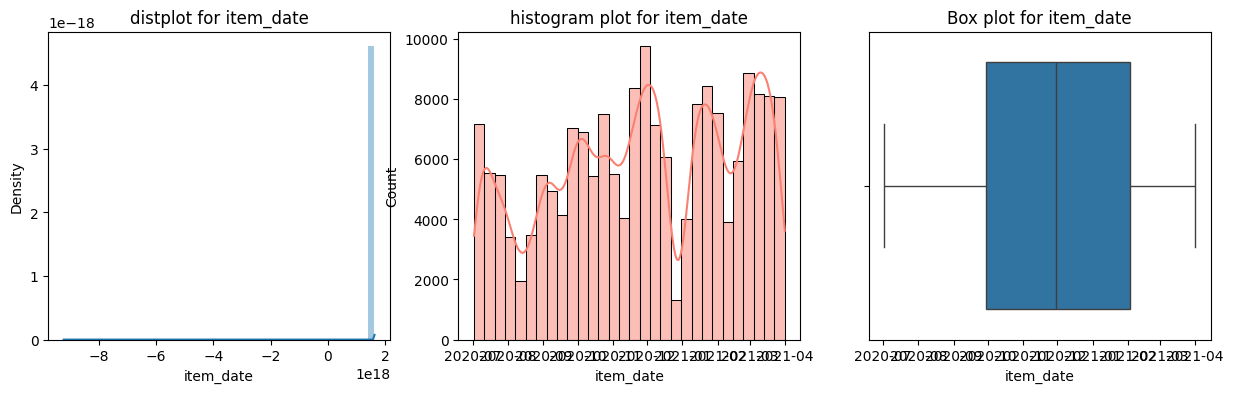

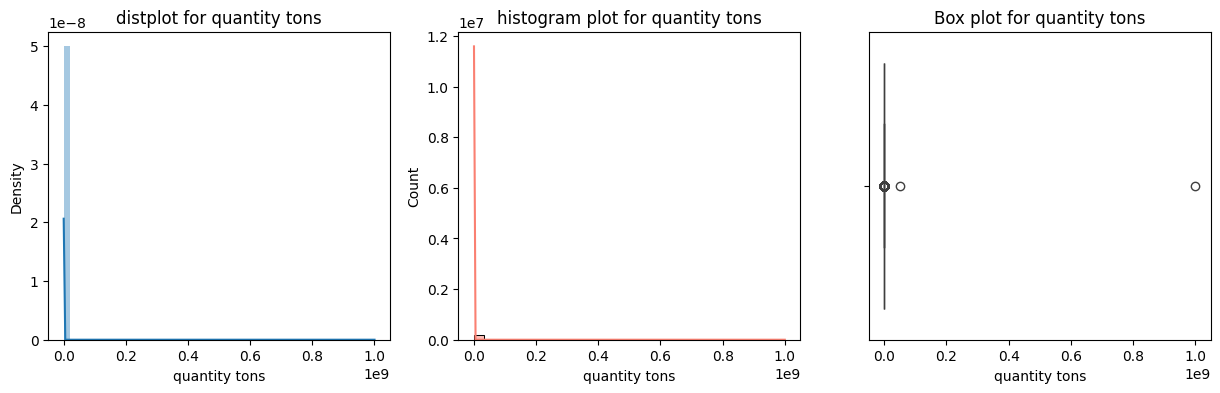

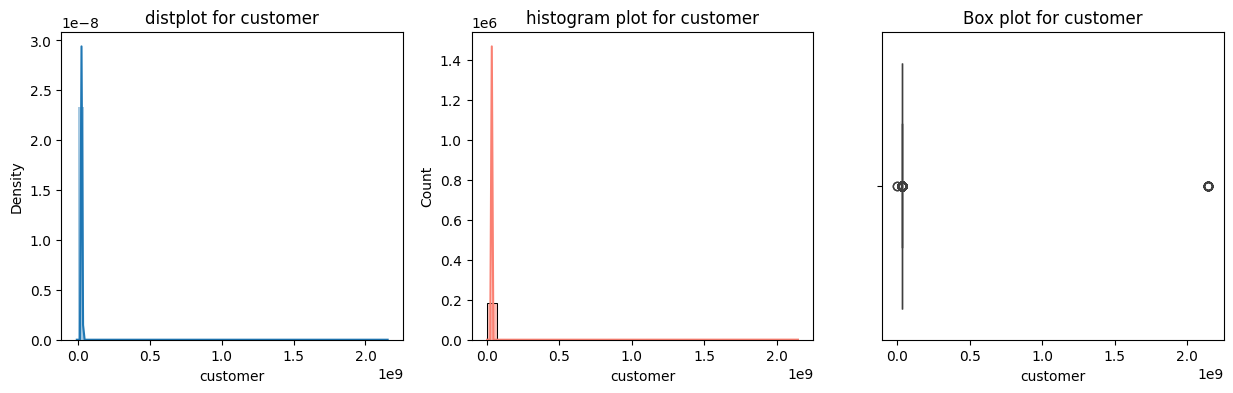

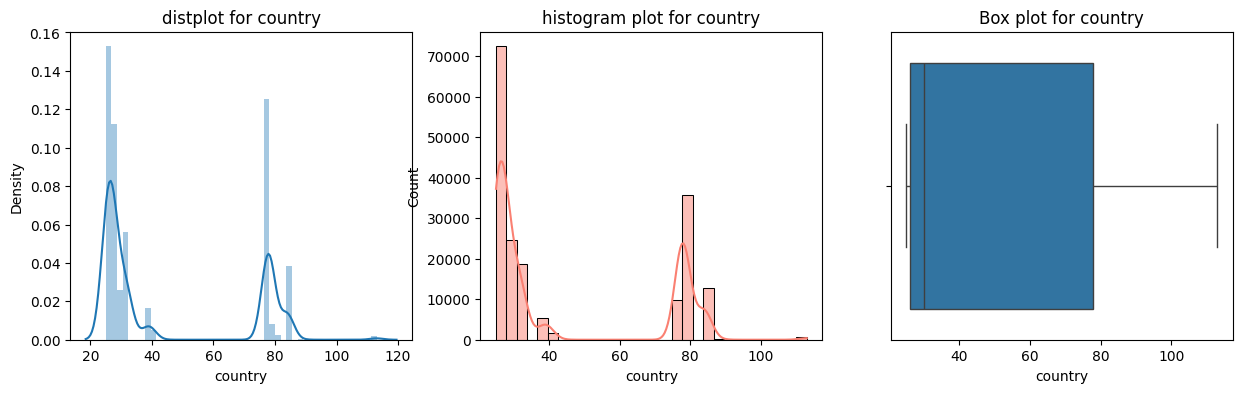

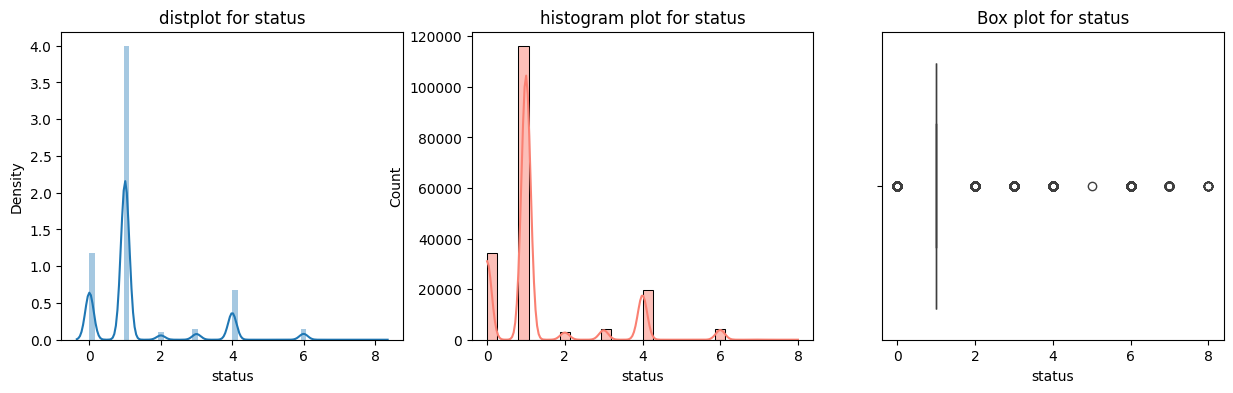

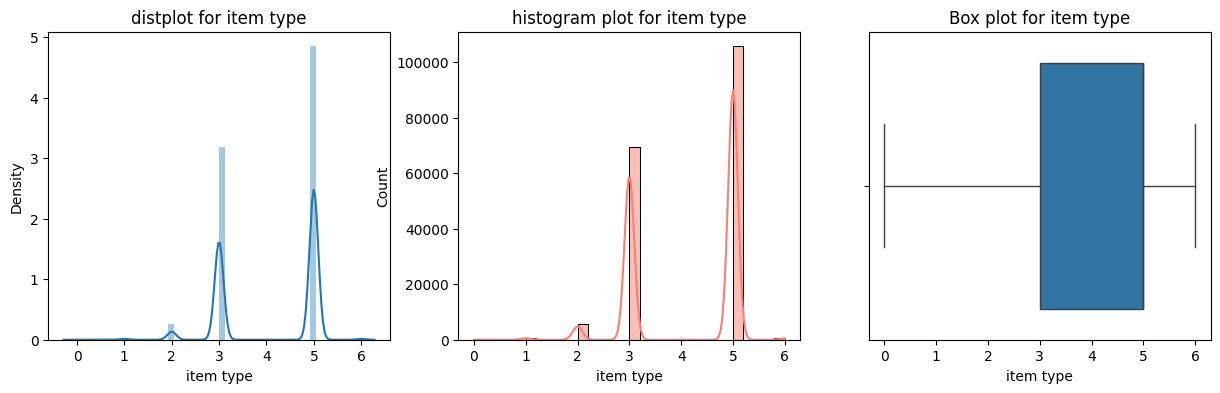

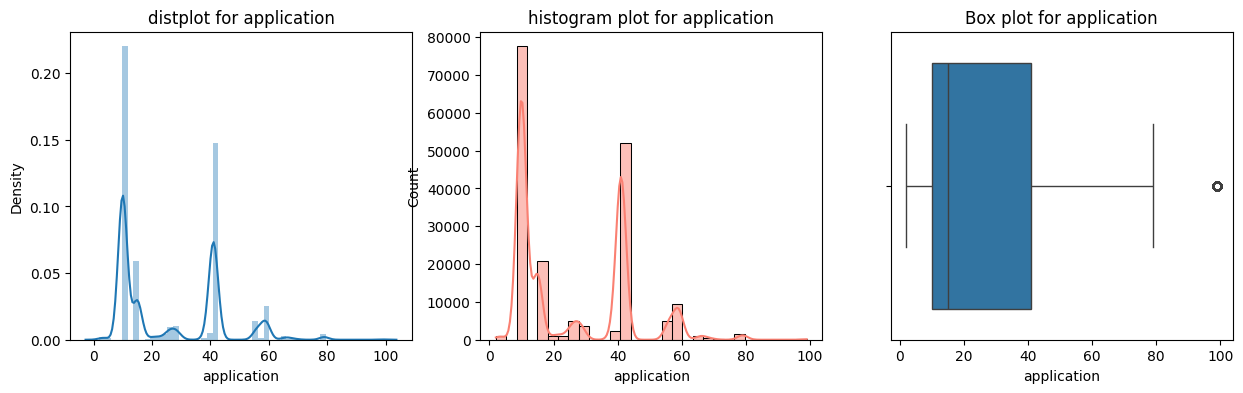

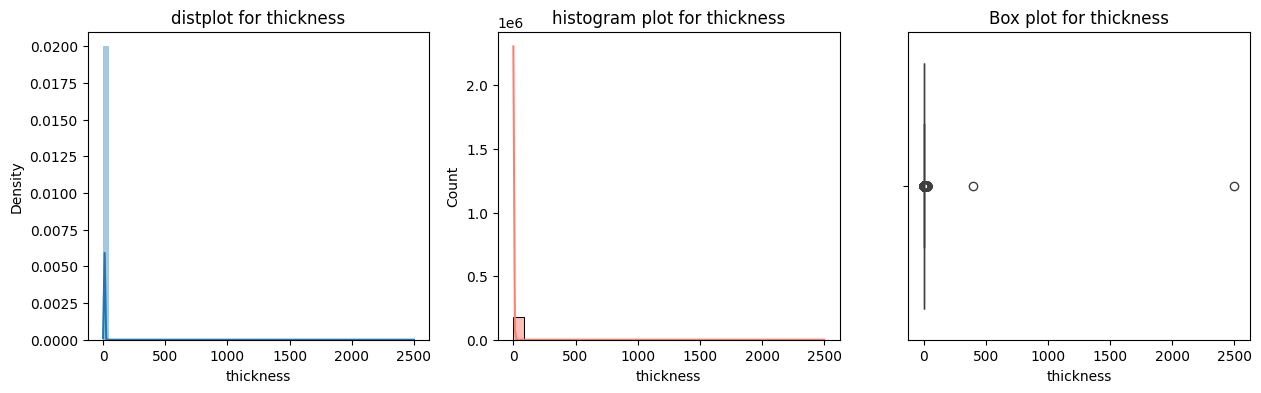

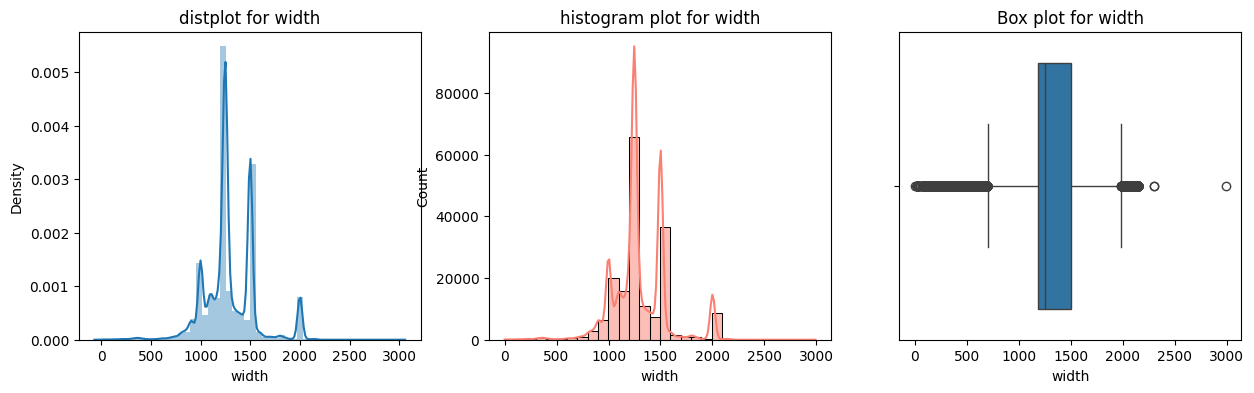

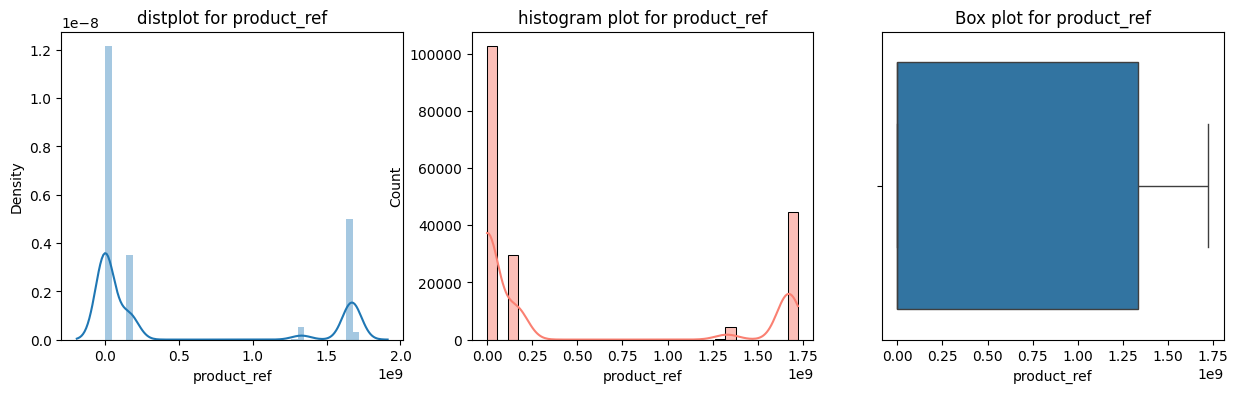

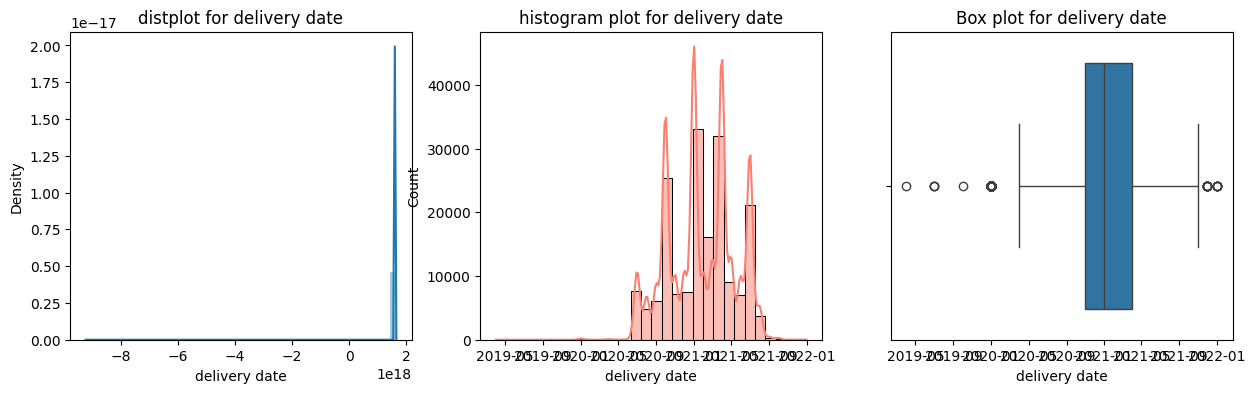

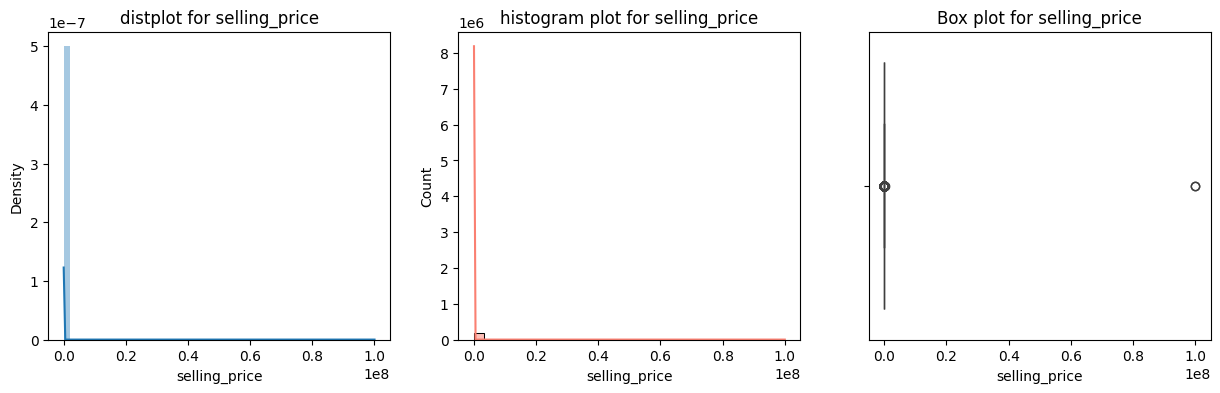

In [33]:
# detecting the skewed columns using plot
def plot(df,column):

  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.distplot(df[column])
  plt.title("distplot for"+" "+column)

  

  plt.subplot(1,3,2)
  sns.histplot(df, x= column, kde= True, bins=30,color="salmon")
  plt.title("histogram plot for"+" "+column)


  plt.subplot(1,3,3)

  sns.boxplot(df, x=column)
  plt.title("Box plot for"+" "+column)
for i in new_data.columns:
    plot(new_data,i)


In [34]:
new_data.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price'],
      dtype='object')

In [35]:
new_data1= new_data.copy

In [36]:
new_data["quantity_tons_log"]= np.log(new_data["quantity tons"])
new_data["customer_log"]= np.log(new_data["customer"])
new_data["thickness_log"]= np.log(new_data["thickness"])
new_data["selling_price_log"]= np.log(new_data["selling_price"])


c:\Users\charu\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\charu\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\charu\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\charu\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\charu\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc,

In [37]:
new_data.isnull().sum()

item_date            3
quantity tons        1
customer             0
country              0
status               0
item type            0
application          0
thickness            0
width                0
product_ref          0
delivery date        3
selling_price        0
quantity_tons_log    5
customer_log         0
thickness_log        0
selling_price_log    5
dtype: int64

In [38]:
new_data['quantity tons'].fillna(0,inplace=True)
new_data['quantity_tons_log'].fillna(0,inplace=True)
new_data['selling_price_log'].fillna(0,inplace=True)

C:\Users\charu\AppData\Local\Temp\ipykernel_25060\2647330678.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],bins=50)
C:\Users\charu\AppData\Local\Temp\ipykernel_25060\2647330678.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],bins=50)
C:\Users\charu\AppData\Local\T

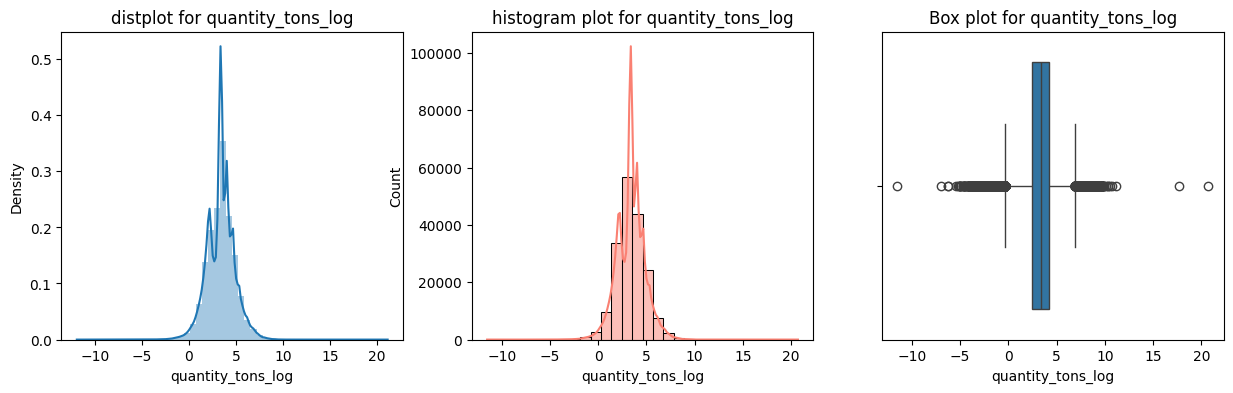

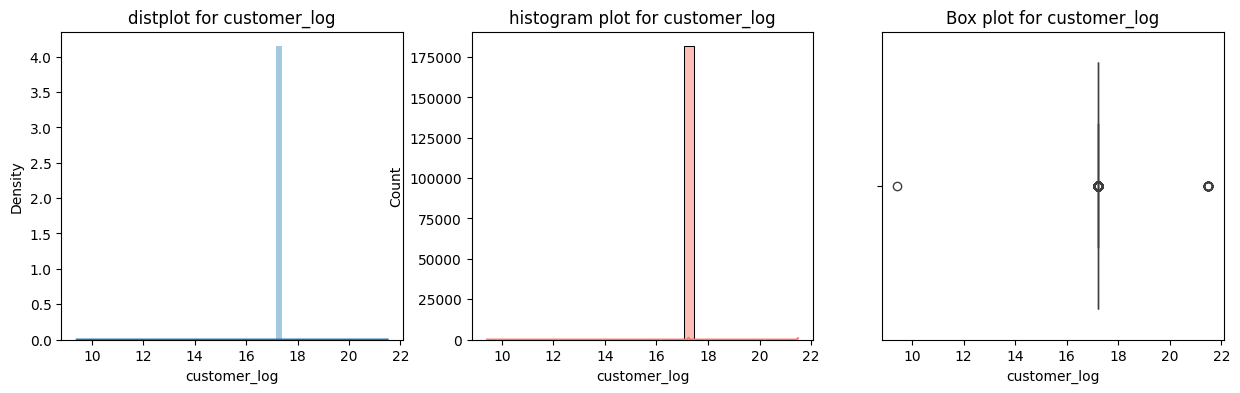

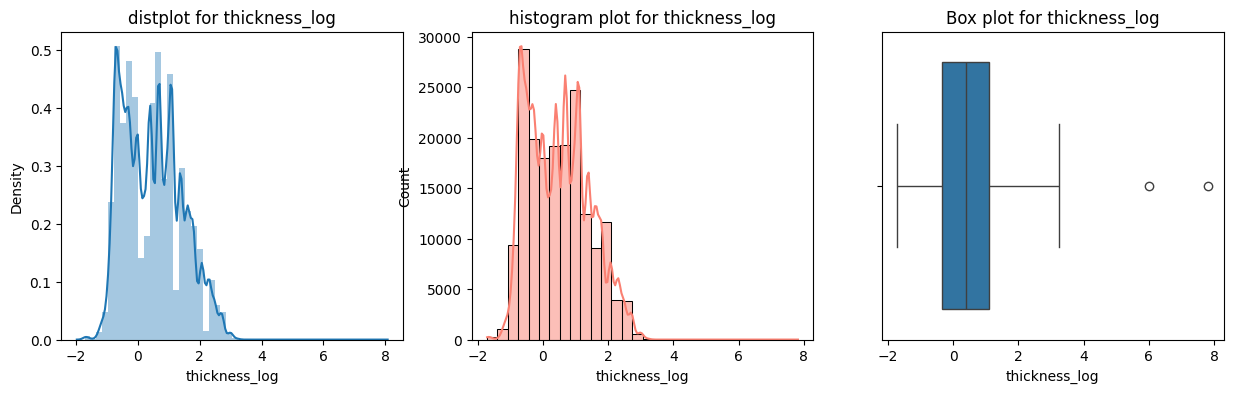

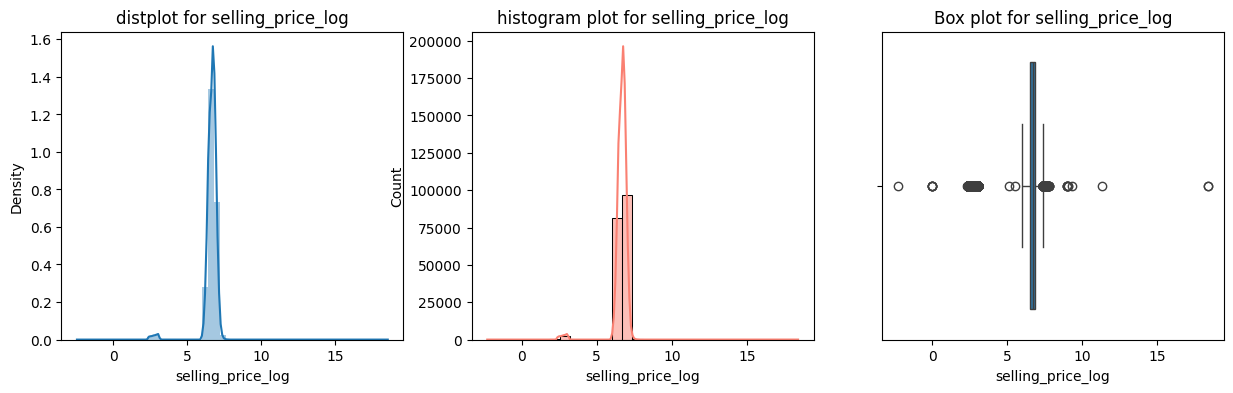

In [39]:
def plot(df,column):

  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.distplot(df[column],bins=50)
  plt.title("distplot for"+" "+column)

  

  plt.subplot(1,3,2)
  sns.histplot(df, x= column, kde= True, bins=30,color="salmon")
  plt.title("histogram plot for"+" "+column)


  plt.subplot(1,3,3)

  sns.boxplot(df, x=column)
  plt.title("Box plot for"+" "+column)


# Replace infinite values with NaN before plotting
new_data.replace([np.inf, -np.inf], np.nan, inplace=True)

skewed_columns = ["quantity_tons_log", "customer_log", "thickness_log", "selling_price_log"]
for column in skewed_columns:
    plot(new_data, column)


In [40]:
def outlier(df,column):
  q1= df[column].quantile(0.25)
  q3= df[column].quantile(0.75)

  iqr= q3-q1

  upper_threshold= q3 + (1.5*iqr)
  lower_threshold= q1 - (1.5*iqr)

  df[column]= df[column].clip(lower_threshold, upper_threshold)

In [41]:

new_data.describe().T

,count,mean,min,25%,50%,75%,max,std
item_date,181668,2020-11-26 22:56:05.294933504,2020-07-02 00:00:00,2020-09-29 00:00:00,2020-11-30 00:00:00,2021-02-03 00:00:00,2021-04-01 00:00:00,NaN
quantity tons,181671.0,5874.957855,-2000.0,10.969987,30.364989,67.16084,1000000000.0,2349087.706868
customer,181671.0,30512044.128248,0.0,30196884.0,30205242.0,30280416.0,2147483647.0,24333987.836634
country,181671.0,44.893076,25.0,26.0,30.0,78.0,113.0,24.402402
status,181671.0,1.316666,0.0,1.0,1.0,1.0,8.0,1.330318
item type,181671.0,4.133026,0.0,3.0,5.0,5.0,6.0,1.055232
application,181671.0,25.615629,2.0,10.0,15.0,41.0,99.0,17.752891
thickness,181671.0,2.564822,0.0,0.7,1.5,3.0,2500.0,6.57234
width,181671.0,1295.289375,1.0,1180.0,1250.0,1500.0,2990.0,261.634007
product_ref,181671.0,473973121.700002,611728.0,611993.0,640665.0,1332077137.0,1722207579.0,717512295.36174


In [42]:
outlier_columns= ['quantity_tons_log', 'customer_log', 'thickness_log','selling_price_log','width','application']
for i in outlier_columns:
  outlier(new_data,i)

In [43]:
new_data.describe().T

,count,mean,min,25%,50%,75%,max,std
item_date,181668,2020-11-26 22:56:05.294933504,2020-07-02 00:00:00,2020-09-29 00:00:00,2020-11-30 00:00:00,2021-02-03 00:00:00,2021-04-01 00:00:00,NaN
quantity tons,181671.0,5874.957855,-2000.0,10.969987,30.364989,67.16084,1000000000.0,2349087.706868
customer,181671.0,30512044.128248,0.0,30196884.0,30205242.0,30280416.0,2147483647.0,24333987.836634
country,181671.0,44.893076,25.0,26.0,30.0,78.0,113.0,24.402402
status,181671.0,1.316666,0.0,1.0,1.0,1.0,8.0,1.330318
item type,181671.0,4.133026,0.0,3.0,5.0,5.0,6.0,1.055232
application,181671.0,25.606387,2.0,10.0,15.0,41.0,87.5,17.717643
thickness,181671.0,2.564822,0.0,0.7,1.5,3.0,2500.0,6.57234
width,181671.0,1297.048979,700.0,1180.0,1250.0,1500.0,1980.0,248.961045
product_ref,181671.0,473973121.700002,611728.0,611993.0,640665.0,1332077137.0,1722207579.0,717512295.36174


C:\Users\charu\AppData\Local\Temp\ipykernel_25060\2647330678.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],bins=50)
C:\Users\charu\AppData\Local\Temp\ipykernel_25060\2647330678.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],bins=50)
C:\Users\charu\AppData\Local\T

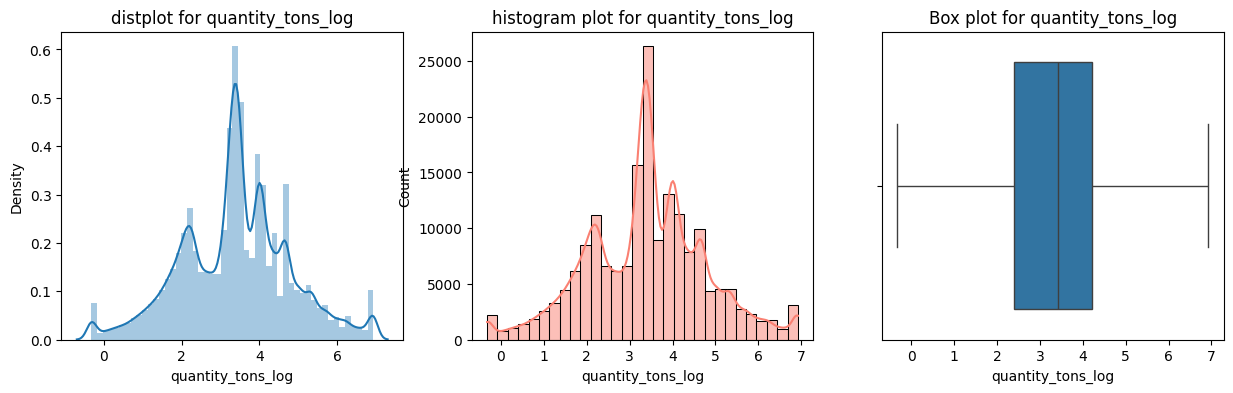

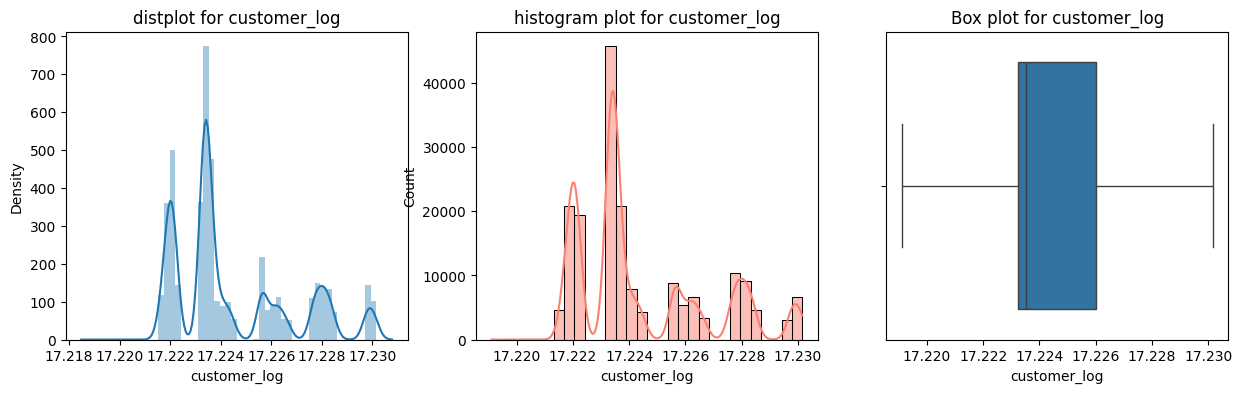

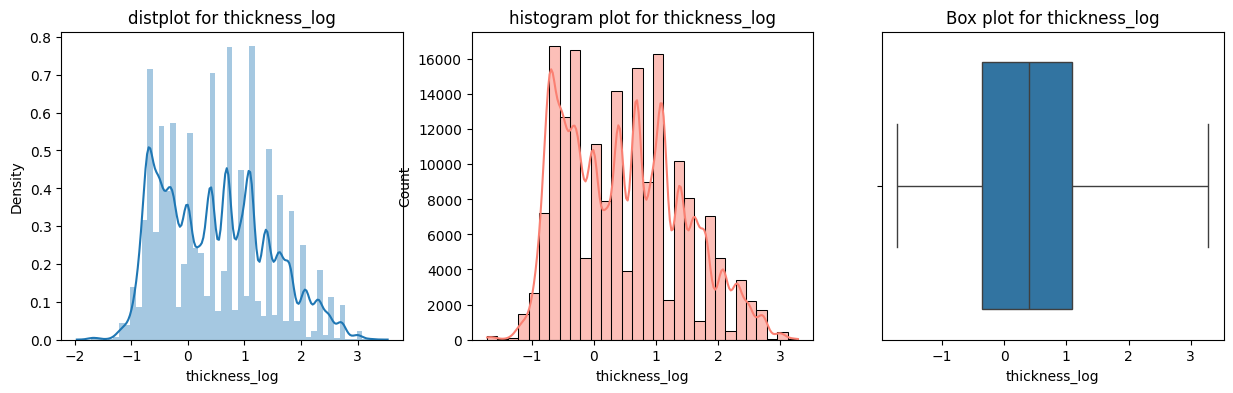

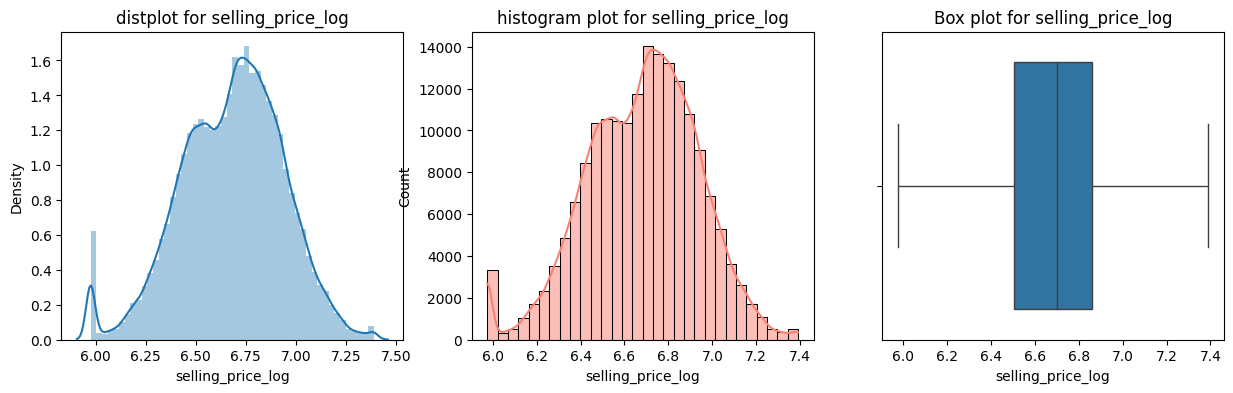

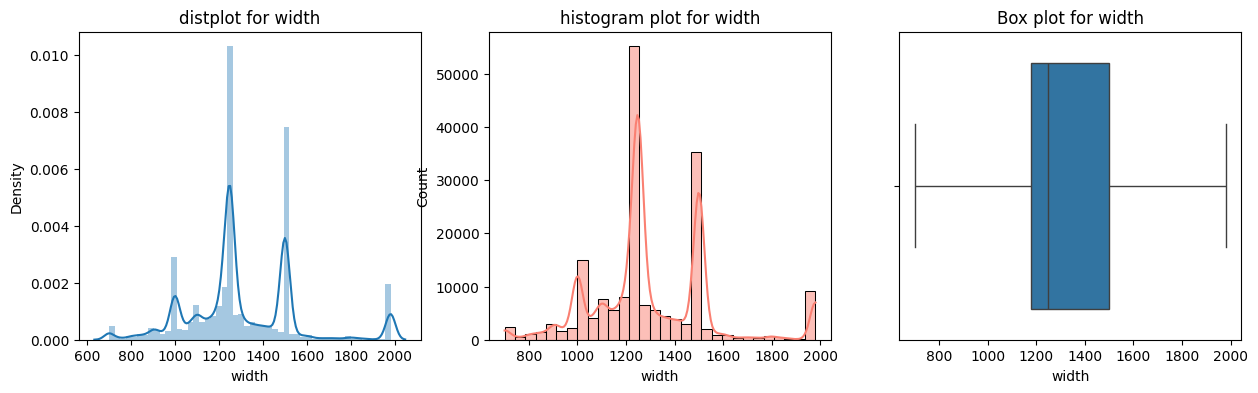

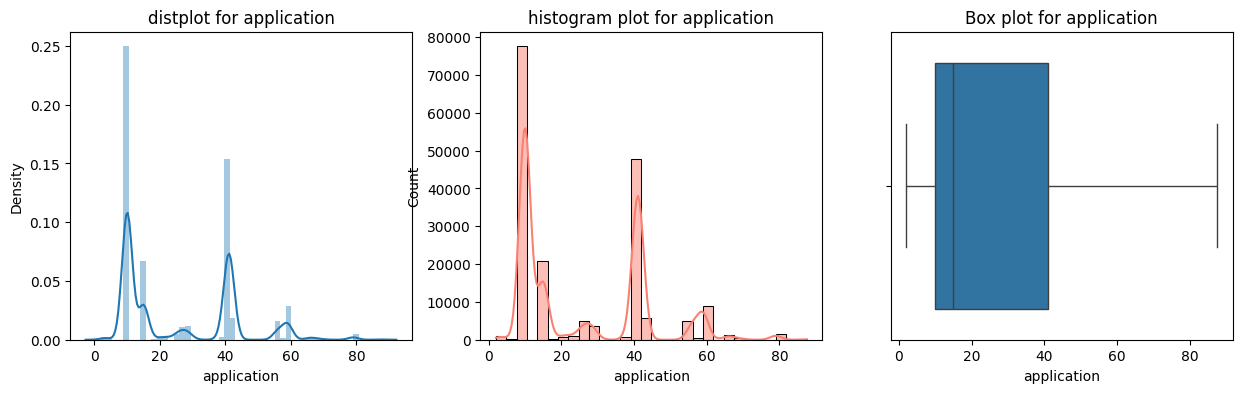

In [44]:

for i in outlier_columns:
  plot(new_data,i)

In [45]:

#Droping the unwanted skewed columns
#Skewed columns:
# 1.quantity tons
# 2.customer
# 3.thickness
# 4.selling_price

new_data1= new_data.drop(columns=["quantity tons","customer","thickness","selling_price"])

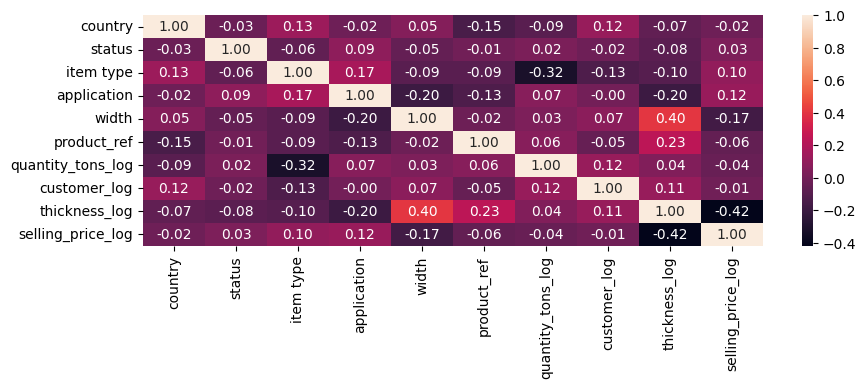

In [46]:
corr= new_data1.drop(columns=["item_date","delivery date"]).corr()
plt.figure(figsize=(10,3))
sns.heatmap(corr, annot= True, fmt="0.2f")
plt.show()

In [47]:
df4= new_data1.copy()

In [48]:
df4.columns

Index(['item_date', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'delivery date', 'quantity_tons_log', 'customer_log',
       'thickness_log', 'selling_price_log'],
      dtype='object')

In [49]:
df4["date_differ"]= (df4["delivery date"]-df4["item_date"]).dt.days

In [50]:
df4["date_differ"].fillna(0).astype(int)

0         91
1          0
2        -90
3        -90
4        -31
          ..
181668    -1
181669    -1
181670    -1
181671    -1
181672    -1
Name: date_differ, Length: 181671, dtype: int32

In [51]:

# some values have a negative values
# it's mean the "delivery date provides , the previous date then the "item date"
# so this is not possible , so we want to predic the delivery date for the some datas
     

#creating the another 3 columns using the "item_date_1"
# it is usefull for the delivery date prediction
df4["item_date_day"]= df4["item_date"].dt.day
df4["item_date_month"]= df4["item_date"].dt.month
df4["item_date_year"]= df4["item_date"].dt.year

In [52]:
#separating the posive values(pv) dataframe and negative values(nv) dataframe based on the "date_differ" column
df4_pv= df4[df4["date_differ"]>=0]
df4_pv.reset_index(drop= True, inplace= True)

In [53]:
df4_nv= df4[df4["date_differ"]<0]
df4_nv.reset_index(drop= True, inplace= True)
     

df4_nv.tail()

,item_date,country,status,item type,application,width,product_ref,delivery date,quantity_tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year
16102,2020-07-02,25,1,5,41.0,1220,164141591,2020-07-01,4.629691,17.223381,-0.040822,6.381816,-1.0,2.0,7.0,2020.0
16103,2020-07-02,25,1,5,41.0,1500,164141591,2020-07-01,5.337954,17.223381,-0.051293,6.378426,-1.0,2.0,7.0,2020.0
16104,2020-07-02,25,1,5,41.0,1250,164141591,2020-07-01,1.443523,17.223381,-0.342490,6.428105,-1.0,2.0,7.0,2020.0
16105,2020-07-02,25,1,5,41.0,1250,164141591,2020-07-01,0.000000,17.223381,-0.162519,6.398595,-1.0,2.0,7.0,2020.0
16106,2020-07-02,25,1,5,41.0,1240,164141591,2020-07-01,6.008043,17.223381,-0.342490,6.408529,-1.0,2.0,7.0,2020.0


In [54]:
# now we want to create the model for delivery date prediction
# importing the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [55]:

df4_pv.columns

Index(['item_date', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'delivery date', 'quantity_tons_log', 'customer_log',
       'thickness_log', 'selling_price_log', 'date_differ', 'item_date_day',
       'item_date_month', 'item_date_year'],
      dtype='object')

In [56]:
#Find the best algorithm for the "delivery date" prediction

def accuracy_date_prediction(df, algorithm):
  x= df.drop(columns=["item_date", "delivery date", "date_differ"])
  y= df["date_differ"]

  #teain test splitting
  x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=42)

  model= algorithm().fit(x_train,y_train)
  y_pred= model.predict(x_test)

  #checking the accuracy score
  mse= mean_squared_error(y_test, y_pred)
  rmse= np.sqrt(mse)
  mae= mean_absolute_error(y_test,y_pred)
  r2= r2_score(y_test, y_pred)

  metrics={"R2_score":r2,
           "Mean_squared_error":mse,
           "Root_mean_squared_error":rmse,
           "Mean_absolute_error":mae,
           }
  return metrics


In [57]:
df4_pv.isnull().sum()

item_date            0
country              0
status               0
item type            0
application          0
width                0
product_ref          0
delivery date        0
quantity_tons_log    0
customer_log         1
thickness_log        1
selling_price_log    3
date_differ          0
item_date_day        0
item_date_month      0
item_date_year       0
dtype: int64

In [58]:
df4_pv['item_date'].fillna(0,inplace=True)
df4_pv['delivery date'].fillna(0,inplace=True)
df4_pv['customer_log'].fillna(0,inplace=True)
df4_pv['thickness_log'].fillna(0,inplace=True)
df4_pv['selling_price_log'].fillna(0,inplace=True)
df4_pv['item_date_day'].fillna(0,inplace=True)
df4_pv['item_date_month'].fillna(0,inplace=True)
df4_pv['item_date_year'].fillna(0,inplace=True)

C:\Users\charu\AppData\Local\Temp\ipykernel_25060\470801498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_pv['item_date'].fillna(0,inplace=True)
C:\Users\charu\AppData\Local\Temp\ipykernel_25060\470801498.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_pv['delivery date'].fillna(0,inplace=True)
C:\Users\charu\AppData\Local\Temp\ipykernel_25060\470801498.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_pv['custo

In [59]:
print(accuracy_date_prediction(df4_pv,DecisionTreeRegressor))
print(accuracy_date_prediction(df4_pv,RandomForestRegressor))
print(accuracy_date_prediction(df4_pv,ExtraTreesRegressor))
print(accuracy_date_prediction(df4_pv,GradientBoostingRegressor))
print(accuracy_date_prediction(df4_pv,AdaBoostRegressor))

{'R2_score': 0.8892614403514366, 'Mean_squared_error': 171.68552186518482, 'Root_mean_squared_error': 13.102882196875038, 'Mean_absolute_error': 3.3281891761295}
{'R2_score': 0.9451998148789793, 'Mean_squared_error': 84.96045470222276, 'Root_mean_squared_error': 9.217399562903996, 'Mean_absolute_error': 3.5775733872916167}
{'R2_score': 0.9585516135854034, 'Mean_squared_error': 64.26025292945157, 'Root_mean_squared_error': 8.016249305594954, 'Mean_absolute_error': 2.6309803092534425}
{'R2_score': 0.5601653822349535, 'Mean_squared_error': 681.9055270811958, 'Root_mean_squared_error': 26.113320874243396, 'Mean_absolute_error': 20.430983876183426}
{'R2_score': 0.11038022479913456, 'Mean_squared_error': 1379.2380526861075, 'Root_mean_squared_error': 37.13809435991712, 'Mean_absolute_error': 31.632085461975645}


In [60]:
# Random Forest algorithm is low bias and reduce overfitting compared to others.
     

# Model for the RandomForest

def RandomForest(train_df, test_df):

  x= train_df.drop(columns=["item_date", "delivery date", "date_differ"])
  y= train_df["date_differ"]

  #train test splitting
  x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=42)
  model= RandomForestRegressor().fit(x_train, y_train)

  data= test_df.drop(columns=["item_date", "delivery date", "date_differ"])

  y_pred=model.predict(data)

  return y_pred

In [61]:

date_difference= RandomForest(df4_pv,df4_nv)
     

date_difference

array([ 48.44, 110.32,  86.75, ...,  35.36,  35.93,  36.01])

In [62]:
# changing the "date_differ" datatype float into int
date_difference_1= []
for i in date_difference:
  dd= int(round(i,0))
  date_difference_1.append(dd)

     



In [63]:
df4_nv["date_differ"]= pd.DataFrame(date_difference_1)
     


C:\Users\charu\AppData\Local\Temp\ipykernel_25060\3396229779.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_nv["date_differ"]= pd.DataFrame(date_difference_1)


In [64]:

df4_nv.isnull().sum()

item_date            0
country              0
status               0
item type            0
application          0
width                0
product_ref          0
delivery date        0
quantity_tons_log    0
customer_log         0
thickness_log        0
selling_price_log    0
date_differ          0
item_date_day        0
item_date_month      0
item_date_year       0
dtype: int64

In [65]:
#find the delivery date using "item_date_1" and "date_differ"

def find_delivery_date(item_date, date_differ):
  date= item_date + pd.to_timedelta(date_differ,unit= "D")
  return date
     

df4_nv["delivery date"]= find_delivery_date(df4_nv["item_date"],df4_nv["date_differ"])
     

# Concadinating the two dataframes(df4_pv,df4_nv) based on the rows
df_final=pd.concat([df4_pv,df4_nv],axis=0,ignore_index=True)
     



C:\Users\charu\AppData\Local\Temp\ipykernel_25060\435863014.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_nv["delivery date"]= find_delivery_date(df4_nv["item_date"],df4_nv["date_differ"])


In [66]:
df_final.tail()

,item_date,country,status,item type,application,width,product_ref,delivery date,quantity_tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year
181660,2020-07-02,25,1,5,41.0,1220,164141591,2020-08-06,4.629691,17.223381,-0.040822,6.381816,35.0,2.0,7.0,2020.0
181661,2020-07-02,25,1,5,41.0,1500,164141591,2020-08-07,5.337954,17.223381,-0.051293,6.378426,36.0,2.0,7.0,2020.0
181662,2020-07-02,25,1,5,41.0,1250,164141591,2020-08-06,1.443523,17.223381,-0.342490,6.428105,35.0,2.0,7.0,2020.0
181663,2020-07-02,25,1,5,41.0,1250,164141591,2020-08-07,0.000000,17.223381,-0.162519,6.398595,36.0,2.0,7.0,2020.0
181664,2020-07-02,25,1,5,41.0,1240,164141591,2020-08-07,6.008043,17.223381,-0.342490,6.408529,36.0,2.0,7.0,2020.0


In [67]:
df_final['delivery date'] = pd.to_datetime(df_final['delivery date'], format='%Y%m%d', errors='coerce')


In [68]:
# Now we create the three new columns using the "delivery_date_1"
df_final['delivery_date_day']= df_final["delivery date"].dt.day
df_final['delivery_date_month']= df_final["delivery date"].dt.month
df_final['delivery_date_year']= df_final["delivery date"].dt.year

In [69]:

# Droping the unwanted columns
df_final.drop(columns=["item_date","delivery date","date_differ"],inplace=True)
     

df_final.columns

Index(['country', 'status', 'item type', 'application', 'width', 'product_ref',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'item_date_day', 'item_date_month',
       'item_date_year', 'delivery_date_day', 'delivery_date_month',
       'delivery_date_year'],
      dtype='object')

In [70]:
df_final.to_csv("Industrial_Copper_Colab.csv",index= False)

In [71]:
#!pip install imbalanced-learn

In [72]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,auc,roc_curve,confusion_matrix,classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from imblearn.combine import SMOTETomek

import pickle

In [73]:
df_class= df_final.copy()
     

# filter the status column only want to be a (won& loss)
df_c= df_class[(df_class["status"] == 1) | (df_class["status"] == 0)]
     

df_c.tail()

,country,status,item type,application,width,product_ref,quantity_tons_log,customer_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
181660,25,1,5,41.0,1220,164141591,4.629691,17.223381,-0.040822,6.381816,2.0,7.0,2020.0,6,8,2020
181661,25,1,5,41.0,1500,164141591,5.337954,17.223381,-0.051293,6.378426,2.0,7.0,2020.0,7,8,2020
181662,25,1,5,41.0,1250,164141591,1.443523,17.223381,-0.342490,6.428105,2.0,7.0,2020.0,6,8,2020
181663,25,1,5,41.0,1250,164141591,0.000000,17.223381,-0.162519,6.398595,2.0,7.0,2020.0,7,8,2020
181664,25,1,5,41.0,1240,164141591,6.008043,17.223381,-0.342490,6.408529,2.0,7.0,2020.0,7,8,2020


In [74]:

df_c["status"].value_counts()

status
1    116006
0     34438
Name: count, dtype: int64

In [75]:
# This is a imbalanced data
# so we want to resampling the data by usin the "SMOTETomek"
     

df_c.columns

Index(['country', 'status', 'item type', 'application', 'width', 'product_ref',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'item_date_day', 'item_date_month',
       'item_date_year', 'delivery_date_day', 'delivery_date_month',
       'delivery_date_year'],
      dtype='object')

In [76]:

x= df_c.drop(columns=["status"],axis=1)
y= df_c["status"]

In [77]:
y.isnull().sum()

0

In [78]:
x['delivery_date_day'].fillna(0,inplace=True)
x['delivery_date_month'].fillna(0,inplace=True)
x['delivery_date_year'].fillna(0,inplace=True)

In [79]:

x.shape,y.shape

((150444, 15), (150444,))

In [80]:
x_new,y_new= SMOTETomek().fit_resample(x,y)

In [81]:
x_new.shape,y_new.shape

((230132, 15), (230132,))

In [82]:

y_new.value_counts()

status
1    115066
0    115066
Name: count, dtype: int64

In [83]:

# now the data is balanced
# so, we continue the ML prediction
     

# find the best algorithm for the classification prediction

def accuracy_checking(x_data, y_data, algorithm):
  #train test splitting
  x_train, x_test, y_train, y_test= train_test_split(x_data, y_data, test_size= 0.2, random_state=42)

  model= algorithm().fit(x_train, y_train)

  y_pred_train= model.predict(x_train)
  y_pred_test= model.predict(x_test)

  #checking the accuracy_score
  accuracy_train= accuracy_score(y_train, y_pred_train)
  accuracy_test= accuracy_score(y_test, y_pred_test)

  metrics={"Algorithm": algorithm.__name__,
           "Accuracy_Train": accuracy_train,
           "Accuracy_Test": accuracy_test}
  return metrics

In [84]:
print(accuracy_checking(x_new,y_new,DecisionTreeClassifier))
print(accuracy_checking(x_new,y_new,RandomForestClassifier))
print(accuracy_checking(x_new,y_new,ExtraTreesClassifier))
print(accuracy_checking(x_new,y_new,AdaBoostClassifier))
print(accuracy_checking(x_new,y_new,GradientBoostingClassifier))

{'Algorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9624568188237339}
{'Algorithm': 'RandomForestClassifier', 'Accuracy_Train': 0.9999945683169931, 'Accuracy_Test': 0.9829882460295044}
{'Algorithm': 'ExtraTreesClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9852260629630434}


c:\Users\charu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'Algorithm': 'AdaBoostClassifier', 'Accuracy_Train': 0.7765731511908965, 'Accuracy_Test': 0.7776522475938037}
{'Algorithm': 'GradientBoostingClassifier', 'Accuracy_Train': 0.813117514461856, 'Accuracy_Test': 0.8143263736502487}


In [85]:
# we got good accuracy after oversampling
# ExtraTreesClassifier and RandomForestClassifier both have good testing accuracy, but in training accuracy is overfitting.
# so we want the reduce the overfitting.
# RandomForestClassifier is good interpretability, so i select the algorithm     
# Get the high accuracy using Hyperparameter Tuning method with using of the GridsearchCV


x_train, x_test, y_train, y_test= train_test_split(x_new,y_new, test_size= 0.2, random_state=42)


parameters = {
    "max_depth": [5, 10],
    "min_samples_split": [2, 5],
    
    "min_samples_leaf": [1, 2],
    "max_features": ['sqrt']
}
gridsearch= GridSearchCV(estimator= RandomForestClassifier(), param_grid= parameters, cv= 5, n_jobs= -1)
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]})

In [86]:
gridsearch.cv_results_

{'mean_fit_time': array([32.47199841, 31.89177604, 31.85960932, 32.74029651, 54.21636472,
        59.11690598, 67.22226787, 56.55619202]),
 'std_fit_time': array([0.78006152, 0.49782269, 0.4440557 , 0.66455863, 0.23009915,
        6.50934248, 1.30071308, 4.76790127]),
 'mean_score_time': array([0.3513711 , 0.36900635, 0.3550621 , 0.31942968, 0.67458482,
        0.87479467, 0.85304556, 0.6126863 ]),
 'std_score_time': array([0.02614104, 0.06226493, 0.05413674, 0.02202024, 0.08483132,
        0.31749295, 0.23428114, 0.05059223]),
 'param_max_depth': masked_array(data=[5, 5, 5, 5, 10, 10, 10, 10],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=['sqrt', 'sqrt', 'sqrt', 'sqrt', 'sqrt', 'sqrt', 'sqrt',
                    'sqrt'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_s

In [87]:
gridsearch.best_score_

0.8792102332907852

In [88]:
gridsearch.best_params_
     

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [109]:
# Passing the best Hypertuning paramers in the ,
# RandomForest algorithm and check the accuracy for training and testing
     

x_train, x_test, y_train, y_test= train_test_split(x_new, y_new, test_size= 0.2, random_state= 42)

model= RandomForestClassifier(max_depth=20, max_features= None, min_samples_leaf=1, min_samples_split=2).fit(x_train,y_train)

y_pred_train= model.predict(x_train)
y_pred_test= model.predict(x_test)

#checking the accuracy_score for train and test

accuracy_train= accuracy_score(y_train, y_pred_train)
accuracy_test= accuracy_score(y_test, y_pred_test)

print("Accuracy score for Train and Test")
print("----------------------------------")
print("Accuracy_Train: ",accuracy_train)
print("Accuracy_Test: ",accuracy_test)
print("  ")
#confution matrics and the classification report for test

print("Confution_matrix for Test")
print("--------------------------")
print(confusion_matrix(y_true= y_test, y_pred= y_pred_test))
print(" ")
print("Classification_report for Test")
print("-------------------------------")
print(classification_report(y_true= y_test, y_pred= y_pred_test))

Accuracy score for Train and Test
----------------------------------
Accuracy_Train:  0.9878982102604492
Accuracy_Test:  0.9705173050600734
  
Confution_matrix for Test
--------------------------
[[22727   357]
 [ 1000 21943]]
 
Classification_report for Test
-------------------------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     23084
           1       0.98      0.96      0.97     22943

    accuracy                           0.97     46027
   macro avg       0.97      0.97      0.97     46027
weighted avg       0.97      0.97      0.97     46027



In [99]:
# now the training accuracy overfitting reduced. so now model will predict effectively for unseen data
# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)


FP,TP,threshold= roc_curve(y_true= y_test, y_score=y_pred_test)
print(threshold)
print(FP)
print(TP)
print(" ")
auc_curve= auc(x=FP,y=TP)
print("auc_curve:",auc_curve)

[inf  1.  0.]
[0.         0.01568186 1.        ]
[0.         0.95811359 1.        ]
 
auc_curve: 0.9712158641397481


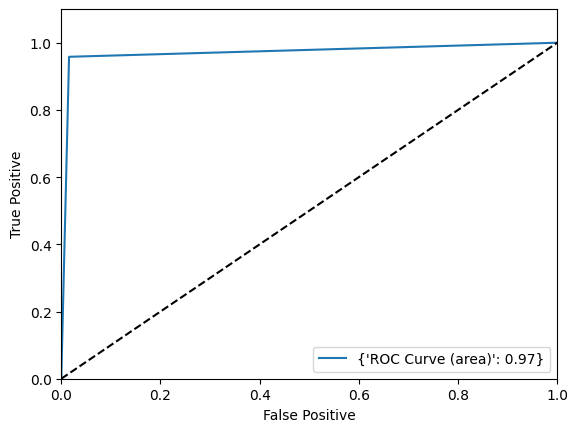

In [100]:
roc_point= {"ROC Curve (area)":round(auc_curve,2)}
plt.plot(FP,TP,label= roc_point)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.plot([0,1],[0,1],"k--")
plt.legend(loc= "lower right")
plt.show()
     

In [101]:
user_data = np.array([[30153963, 30, 6, 28, 952, 628377, 5.9, -0.96, 6.46, 1,4,2021,1,1,2021]])
y_pred_user= model.predict(user_data)
if y_pred_user == 1:
    print("Won")
else:
    print("Lose")

Lose


c:\Users\charu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [102]:
import pickle

In [104]:
with open("Classification_model.pkl","wb") as f:
    pickle.dump(model,f)

In [105]:
try:
    with open("/content/Classification_model.pkl","rb") as f1:
       class_model= pickle.load(f1)
except:
    pass


In [111]:
import pickle

# Assuming 'model' is your trained model
with open("Classification_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [112]:
import pickle
import numpy as np

try:
    with open("Classification_model.pkl", "rb") as f:
        class_model = pickle.load(f)
except Exception as e:
    print(f"Error loading model: {e}")
    class_model = None

# Ensure class_model is loaded correctly and is not a dictionary
if isinstance(class_model, dict):
    raise ValueError("Loaded object is a dictionary, not a model")

print(f"Model type: {type(class_model)}")

Model type: <class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [115]:
if class_model is not None:
    # First set of user data
    user_data1 = np.array([[30153963, 30, 6, 28, 952, 628377, 5.9, -0.96, 6.46, 1, 4, 2021, 1, 1, 2021]])
    y_pred_user1 = class_model.predict(user_data1)

    if y_pred_user1 == 1:
        print("Won")
    else:
        print("Lose")

    # Second set of user data
    user_data2 = np.array([[77.0, 3.0, 10.0, 1500.0, 164141591, 3.677655, 17.222226, 0.000000, 7.110696, 1, 4, 2021,0,0,0]])
    y_pred_user2 = class_model.predict(user_data2)

    if y_pred_user2 == 1:
        print("Won")
    else:
        print("Lose")
else:
    print("Model is not loaded correctly.")


Lose
Won


c:\Users\charu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\charu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


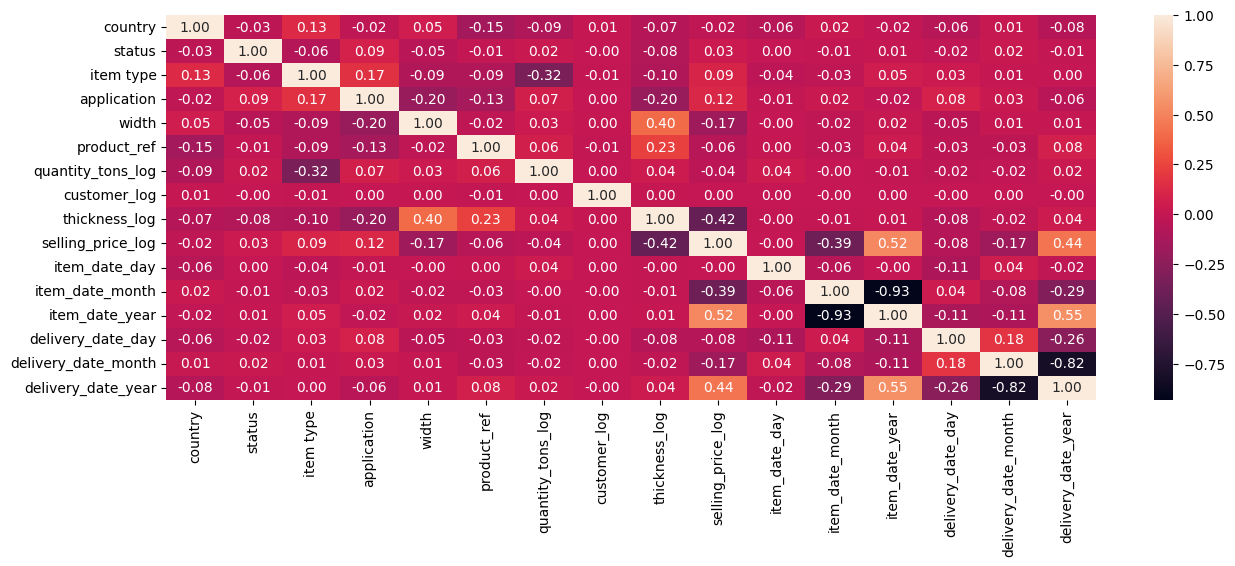

In [124]:
corr= df_final.corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr,annot= True, fmt="0.2f")
plt.show()

In [117]:
#packages

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [118]:
df_regg= df_final.copy()

In [122]:
#Find the best ML model to predict the selling price

def accuracy_regressor(df,algorithm):

  x= df.drop(columns=["selling_price_log"], axis=1)
  y= df["selling_price_log"]

  #train test splitting
  x_train,x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=42)
  model= algorithm().fit(x_train, y_train)

  y_pred_train= model.predict(x_train)
  y_pred_test= model.predict(x_test)

  r2_train= r2_score(y_train, y_pred_train)
  r2_test= r2_score(y_test, y_pred_test)

  metrics={"Algorithm":algorithm.__name__,
           "R2_Train": r2_train,
           "R2_Test": r2_test}

  return metrics

In [120]:
print(accuracy_regressor(df_regg, DecisionTreeRegressor))
print(accuracy_regressor(df_regg, RandomForestRegressor))
print(accuracy_regressor(df_regg, ExtraTreesRegressor))
print(accuracy_regressor(df_regg, AdaBoostRegressor))
print(accuracy_regressor(df_regg, GradientBoostingRegressor))

{'Algorithm': 'DecisionTreeRegressor', 'R2_Train': 0.999929179349281, 'R2_Test': 0.8868311923472589}
{'Algorithm': 'RandomForestRegressor', 'R2_Train': 0.9912229472855169, 'R2_Test': 0.9526974720014793}
{'Algorithm': 'ExtraTreesRegressor', 'R2_Train': 0.999929179349281, 'R2_Test': 0.9482984014153227}
{'Algorithm': 'AdaBoostRegressor', 'R2_Train': 0.35285588221055264, 'R2_Test': 0.3431883581754739}
{'Algorithm': 'GradientBoostingRegressor', 'R2_Train': 0.8779369067455054, 'R2_Test': 0.8879532547201301}


In [125]:
# ExtraTreesClassifier and RandomForestClassifier both have good testing accuracy, but in training accuracy is overfitting.
# RandomForestClassifier is good interpretability, so i select the algorithm
     

x= df_regg.drop(columns=["selling_price_log"], axis=1)
y= df_regg["selling_price_log"]

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state= 42)

parameters_r= {
    "max_depth": [10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt", "log2"]
}
              

gridsearch_r= GridSearchCV(estimator= RandomForestRegressor(), param_grid= parameters_r, cv= 5,n_jobs=-1)
gridsearch_r.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]})

In [129]:
gridsearch_r.cv_results_ 

{'mean_fit_time': array([29.03160634, 25.99871097, 25.78822002, 24.82761192, 25.12264528,
        24.73982568, 24.65859728, 31.23082643, 57.26170197, 43.03925776,
        41.05090652, 41.86050563, 51.82858448, 44.76295471, 47.26190114,
        42.55507603]),
 'std_fit_time': array([1.79706196, 0.52881079, 0.60610087, 0.24715726, 0.16192948,
        0.2995299 , 0.08642499, 3.45329061, 3.69785352, 1.11171211,
        0.4471024 , 0.75876298, 1.6275695 , 1.52056408, 1.92076891,
        2.5862083 ]),
 'mean_score_time': array([0.53068867, 0.52970872, 0.54110675, 0.5268136 , 0.51251645,
        0.56828084, 0.51067886, 0.91487365, 4.17419991, 2.31235771,
        2.33492889, 2.33020606, 3.81267142, 2.42908626, 2.10527701,
        2.05330086]),
 'std_score_time': array([0.05006903, 0.02536108, 0.0297156 , 0.04352279, 0.01982887,
        0.09181   , 0.02125697, 0.36339852, 0.84731243, 0.09313775,
        0.29111359, 0.29101406, 0.07992419, 0.07441908, 0.10483703,
        0.12539125]),
 'param_ma

In [130]:
gridsearch_r.best_score_


0.932832278031239

In [131]:
gridsearch_r.best_params_


{'max_depth': 20,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [132]:
# pass the parameters and check the accuracy for both training and testing & overfitting

x = df_regg.drop(columns=['selling_price_log'], axis=1)
y = df_regg['selling_price_log']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model_r = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred_train = model_r.predict(x_train)
y_pred_test = model_r.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train, r2_test

(0.9838200543845103, 0.9513951080167966)

In [133]:
#predict the selling price with hypertuning parameters and calculate the accuracy using metrics

x = df_regg.drop(columns=['selling_price_log'], axis=1)
y = df_regg['selling_price_log']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model_r = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred = model_r.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

metrics_r = {'R2': r2,
           'Mean Absolute Error': mae,
           'Mean Squared Error': mse,
           'Root Mean Squared Error': rmse}

metrics_r

{'R2': 0.9535124373067372,
 'Mean Absolute Error': 0.03204024330417163,
 'Mean Squared Error': 0.0030237776901704057,
 'Root Mean Squared Error': 0.054988886969736035}

In [134]:
user_data = np.array([[30202938,25,1,5,41,1210,1668701718,6.6,-0.2,1,4,2021,1,4,2021]])
y_pred = model_r.predict(user_data)
print("Predicted selling price with Log: ",y_pred[0])
print("Predicted selling price without Log: ",np.exp(y_pred[0]))

Predicted selling price with Log:  7.111254159973291
Predicted selling price without Log:  1225.683786089441


c:\Users\charu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [135]:
import pickle
     

with open("Regression_Model.pkl","wb") as r:
  pickle.dump(model_r,r)
     

with open("Regression_Model.pkl","rb") as r1:
  regg_model=pickle.load(r1)
     

df_final.head()

,country,status,item type,application,width,product_ref,quantity_tons_log,customer_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,28,1,5,10.0,1500,1670798778,3.991779,17.221905,0.693147,6.749931,1.0,4.0,2021.0,1,7,2021
1,25,1,5,41.0,1210,1668701718,6.643822,17.223450,-0.223144,6.953684,1.0,4.0,2021.0,1,4,2021
2,25,1,5,41.0,1265,1668701718,5.419608,17.223450,0.405465,6.890609,1.0,4.0,2021.0,1,4,2021
3,30,2,5,41.0,1125,611993,1.259203,17.223667,-0.967584,5.975038,1.0,4.0,2021.0,1,7,2021
4,38,1,3,10.0,1275,1668701376,4.235147,17.228025,-0.510826,7.217443,1.0,4.0,2021.0,1,7,2021


In [136]:
user_data = np.array([[28.0,1,5.0,10.0,1500.0,1670798778,3.991779,17.221905,0.693147,1,4,2021,1,7,2021]])
y_pred = regg_model.predict(user_data)
print("Predicted selling price with Log: ",y_pred[0])
print("Predicted selling price without Log: ",np.exp(y_pred[0]))    

Predicted selling price with Log:  6.914115742880992
Predicted selling price without Log:  1006.3807346035987


c:\Users\charu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
